In [1]:
import numpy as np
import pandas as pd
import gc
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from keras import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout

Using TensorFlow backend.


In [2]:
columns=["sentiment", "ids", "date", "flag", "user", "text"]
data=pd.read_csv('../Dataset/raw/data.csv',names=columns,encoding='ISO-8859-1')

In [3]:
data=data[["text","sentiment"]]
data.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [4]:
#Converting Tweets to LowerCase
data["text"]=data.text.str.lower()

#Replacing Links with "URL"
data["text"]=data["text"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

#Removing the Usernames
data["text"]=data["text"].str.replace(r'@[^\s]+',"")

#Removing all Non Alpha Numeric Characters
data["text"]=data["text"].str.replace(r'[^A-Za-z0-9 ]+',"")

#Removng Stopwords
stop_words = stopwords.words('english') 
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



In [5]:
data

,text,sentiment
0,URL awww thats bummer shoulda got david carr t...,0
1,upset cant update facebook texting might cry r...,0
2,dived many times ball managed save 50 rest go ...,0
3,whole body feels itchy like fire,0
4,behaving im mad cant see,0
...,...,...
1599995,woke school best feeling ever,4
1599996,thewdbcom cool hear old walt interviews URL,4
1599997,ready mojo makeover ask details,4
1599998,happy 38th birthday boo alll time tupac amaru ...,4


In [6]:
tweets=data["text"].tolist()
sentiment=data["sentiment"].tolist()

'URL awww thats bummer shoulda got david carr third day'

In [7]:
X_train, X_test, y_train, y_test = train_test_split(tweets,sentiment,test_size = 0.10, random_state = 0)

In [9]:
number_of_most_frequent_words=10000 # Only keep the most frequent 10k words 
max_len=20  # Majaority of training tweets are less than 20

In [10]:
# Coverting into tokens
t  = Tokenizer(num_words=number_of_most_frequent_words)
t.fit_on_texts(X_train)
X_train = t.texts_to_sequences(X_train)
X_test=t.texts_to_sequences(X_test)

In [18]:
# X_test

Average Word Length:  6.505825694444445
 Std Deviation:  3.6986443770591007


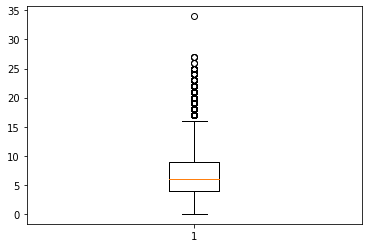

In [11]:
text_len = [len(X_train[i]) for i in range(len(X_train))]
print(" Average Word Length: ", np.mean(text_len))
print(" Std Deviation: ", np.std(text_len))
plt.boxplot(text_len)
plt.show()

In [12]:
X_train = pad_sequences(X_train,maxlen=max_len,padding='post' )
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

In [13]:
model = Sequential()
model.add(Embedding(input_dim=number_of_most_frequent_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 128)           1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
result= model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Train on 1440000 samples, validate on 160000 samples
Epoch 1/5
 450976/1440000 [========>.....................] - ETA: 11:32 - loss: -862.2134 - accuracy: 9.0692e-04

KeyboardInterrupt: 